In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set_style('darkgrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
import warnings

In [106]:
df_hpd=pd.read_csv('Order_to_Repair_Vacate_Orders.csv')

In [110]:
df_hpd.head()

,BUILDING ID,REGISTRATION ID,BOROUGH,NUMBER,STREET,VACATE ORDER NUMBER,PRIMARY VACATE REASON,VACATE TYPE,VACATE EFFECTIVE DATE,RESCIND DATE,NUMBER OF VACATED UNITS,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA
0,896801,381897,BK,1662,DEAN STREET,100282,Illegal Occupancy,Partial,11/23/2012,NaN,1,11213.0,40.67592,-73.93257,8.0,36.0,309.0,3392424.0,3.013480e+09,Crown Heights North ...
1,90265,200893,BX,3414,KNOX PLACE,142395,Fire Damage,Partial,1/10/2018,9/12/2018,7,10467.0,40.88172,-73.88373,7.0,11.0,421.0,2017700.0,2.033240e+09,Norwood
2,688955,0,QN,14-19,POINT BREEZE PLACE,145612,Illegal Occupancy,Partial,9/26/2018,NaN,1,11691.0,40.61110,-73.77100,14.0,31.0,100801.0,4300123.0,4.157020e+09,Far Rockaway-Bayswater
3,361981,0,BK,148,RIDGEWOOD AVENUE,145817,Illegal Occupancy,Partial,9/27/2018,NaN,1,11208.0,40.68302,-73.88331,5.0,37.0,117202.0,3087219.0,3.039280e+09,Cypress Hills-City Line
4,517813,0,QN,127-11,107 AVENUE,134634,Illegal Occupancy,Partial,1/13/2017,NaN,1,11419.0,40.68627,-73.81648,10.0,28.0,15802.0,4204732.0,4.095810e+09,South Ozone Park


In [111]:
df_hpd.sort_values('BOROUGH',inplace=True)
df_hpd.head(10)

,BUILDING ID,REGISTRATION ID,BOROUGH,NUMBER,STREET,VACATE ORDER NUMBER,PRIMARY VACATE REASON,VACATE TYPE,VACATE EFFECTIVE DATE,RESCIND DATE,NUMBER OF VACATED UNITS,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA
0,896801,381897,BK,1662,DEAN STREET,100282,Illegal Occupancy,Partial,11/23/2012,NaN,1,11213.0,40.67592,-73.93257,8.0,36.0,309.0,3392424.0,3.013480e+09,Crown Heights North ...
3481,385281,368743,BK,321,VAN SICLEN AVENUE,144915,Fire Damage,Partial,7/17/2018,NaN,1,11207.0,40.67208,-73.89015,5.0,37.0,1152.0,3089098.0,3.040100e+09,East New York ...
3483,258700,313201,BK,209,EAST 34 STREET,136739,Fire Damage,Partial,4/18/2017,7/11/2018,1,11203.0,40.65192,-73.94579,17.0,40.0,816.0,3108694.0,3.048710e+09,East Flatbush-Farragut ...
3486,325104,0,BK,471,LEXINGTON AVENUE,94210,Fire Damage,Entire Building,3/19/2012,1/30/2019,9,11221.0,40.68857,-73.94325,3.0,36.0,263.0,3050485.0,3.018000e+09,Bedford
3488,310574,820821,BK,680,HENDRIX STREET,135188,Habitability,Entire Building,1/17/2017,7/27/2020,5,11207.0,40.66491,-73.88740,5.0,42.0,1124.0,3090699.0,3.040880e+09,East New York
3684,398859,366816,BK,678,WYONA STREET,134493,Illegal Occupancy,Partial,12/15/2016,NaN,1,11207.0,40.66192,-73.88990,5.0,42.0,1128.0,3096592.0,3.043010e+09,East New York (Pennsylvania Ave) ...
3685,398782,327442,BK,499,WYONA STREET,141165,Illegal Occupancy,Partial,11/9/2017,NaN,1,11207.0,40.66623,-73.89148,5.0,42.0,1126.0,3084752.0,3.038090e+09,East New York (Pennsylvania Ave) ...
3686,398782,327442,BK,499,WYONA STREET,140610,Illegal Occupancy,Partial,10/2/2017,NaN,1,11207.0,40.66623,-73.89148,5.0,42.0,1126.0,3084752.0,3.038090e+09,East New York (Pennsylvania Ave) ...
3687,398782,327442,BK,499,WYONA STREET,121003,Illegal Occupancy,Partial,2/1/2015,NaN,5,11207.0,40.66623,-73.89148,5.0,42.0,1126.0,3084752.0,3.038090e+09,East New York (Pennsylvania Ave) ...
3480,351487,0,BK,1310,PARK PLACE,154938,Illegal Occupancy,Partial,7/22/2020,NaN,1,11213.0,40.67256,-73.93426,8.0,36.0,345.0,3036437.0,3.013710e+09,Crown Heights North


In [82]:
df_hpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BUILDING ID              5769 non-null   int64  
 1   REGISTRATION ID          5769 non-null   int64  
 2   BOROUGH                  5769 non-null   object 
 3   NUMBER                   5769 non-null   object 
 4   STREET                   5769 non-null   object 
 5   VACATE ORDER NUMBER      5769 non-null   int64  
 6   PRIMARY VACATE REASON    5769 non-null   object 
 7   VACATE TYPE              5769 non-null   object 
 8   VACATE EFFECTIVE DATE    5769 non-null   object 
 9   RESCIND DATE             2269 non-null   object 
 10  NUMBER OF VACATED UNITS  5769 non-null   int64  
 11  POSTCODE                 5768 non-null   float64
 12  LATITUDE                 5768 non-null   float64
 13  LONGITUDE                5768 non-null   float64
 14  COMMUNITY BOARD         

In [21]:
df_hpd.shape

(5769, 20)

In [22]:
df_hpd.describe()

,BUILDING ID,REGISTRATION ID,VACATE ORDER NUMBER,NUMBER OF VACATED UNITS,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL
count,5769.000000,5769.000000,5769.000000,5769.000000,5768.000000,5768.000000,5768.000000,5768.000000,5768.000000,5768.000000,5.757000e+03,5.757000e+03
mean,321349.291212,247150.294678,134541.083723,2.304559,10852.516123,40.741007,-73.903512,8.454230,25.587899,6668.203883,2.852231e+06,2.789157e+09
std,270274.083665,241385.808999,22692.874665,4.394666,509.138497,0.089132,0.074366,4.659703,13.540180,19003.635597,1.120704e+06,1.080310e+09
min,65.000000,0.000000,2327.000000,1.000000,10001.000000,40.517730,-74.233240,1.000000,1.000000,1.000000,1.000000e+06,1.000160e+09
25%,81656.000000,0.000000,117778.000000,1.000000,10457.000000,40.668807,-73.944465,4.000000,14.000000,206.000000,2.013558e+06,2.030880e+09
50%,271656.000000,207598.000000,135552.000000,1.000000,11206.000000,40.715460,-73.908550,9.000000,27.000000,375.000000,3.060083e+06,3.018128e+09
75%,524139.000000,349063.000000,148553.000000,2.000000,11236.000000,40.830663,-73.863935,12.000000,37.000000,872.000000,4.024135e+06,4.010950e+09
max,999969.000000,970211.000000,196619.000000,133.000000,11694.000000,40.906780,-73.705740,18.000000,51.000000,157902.000000,5.167961e+06,5.080070e+09


In [23]:
df_hpd.head()

,BUILDING ID,REGISTRATION ID,BOROUGH,NUMBER,STREET,VACATE ORDER NUMBER,PRIMARY VACATE REASON,VACATE TYPE,VACATE EFFECTIVE DATE,RESCIND DATE,NUMBER OF VACATED UNITS,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA
0,896801,381897,BK,1662,DEAN STREET,100282,Illegal Occupancy,Partial,11/23/2012,NaN,1,11213.0,40.67592,-73.93257,8.0,36.0,309.0,3392424.0,3.013480e+09,Crown Heights North ...
1,90265,200893,BX,3414,KNOX PLACE,142395,Fire Damage,Partial,1/10/2018,9/12/2018,7,10467.0,40.88172,-73.88373,7.0,11.0,421.0,2017700.0,2.033240e+09,Norwood
2,688955,0,QN,14-19,POINT BREEZE PLACE,145612,Illegal Occupancy,Partial,9/26/2018,NaN,1,11691.0,40.61110,-73.77100,14.0,31.0,100801.0,4300123.0,4.157020e+09,Far Rockaway-Bayswater
3,361981,0,BK,148,RIDGEWOOD AVENUE,145817,Illegal Occupancy,Partial,9/27/2018,NaN,1,11208.0,40.68302,-73.88331,5.0,37.0,117202.0,3087219.0,3.039280e+09,Cypress Hills-City Line
4,517813,0,QN,127-11,107 AVENUE,134634,Illegal Occupancy,Partial,1/13/2017,NaN,1,11419.0,40.68627,-73.81648,10.0,28.0,15802.0,4204732.0,4.095810e+09,South Ozone Park


In [24]:
df_hpd.isnull().sum()



BUILDING ID                   0
REGISTRATION ID               0
BOROUGH                       0
NUMBER                        0
STREET                        0
VACATE ORDER NUMBER           0
PRIMARY VACATE REASON         0
VACATE TYPE                   0
VACATE EFFECTIVE DATE         0
RESCIND DATE               3500
NUMBER OF VACATED UNITS       0
POSTCODE                      1
LATITUDE                      1
LONGITUDE                     1
COMMUNITY BOARD               1
COUNCIL DISTRICT              1
CENSUS TRACT                  1
BIN                          12
BBL                          12
NTA                           1
dtype: int64

In [25]:
df_hpd.dtypes

BUILDING ID                  int64
REGISTRATION ID              int64
BOROUGH                     object
NUMBER                      object
STREET                      object
VACATE ORDER NUMBER          int64
PRIMARY VACATE REASON       object
VACATE TYPE                 object
VACATE EFFECTIVE DATE       object
RESCIND DATE                object
NUMBER OF VACATED UNITS      int64
POSTCODE                   float64
LATITUDE                   float64
LONGITUDE                  float64
COMMUNITY BOARD            float64
COUNCIL DISTRICT           float64
CENSUS TRACT               float64
BIN                        float64
BBL                        float64
NTA                         object
dtype: object

In [130]:
df_hpd['VACATE EFFECTIVE DATE']=pd.to_datetime(df_hpd['VACATE EFFECTIVE DATE'])
df_hpd['RESCIND DATE']=pd.to_datetime(df_hpd['RESCIND DATE'])
df_hpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 375
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BUILDING ID              5769 non-null   int64         
 1   REGISTRATION ID          5769 non-null   int64         
 2   BOROUGH                  5769 non-null   object        
 3   NUMBER                   5769 non-null   object        
 4   STREET                   5769 non-null   object        
 5   VACATE ORDER NUMBER      5769 non-null   int64         
 6   PRIMARY VACATE REASON    5769 non-null   object        
 7   VACATE TYPE              5769 non-null   object        
 8   VACATE EFFECTIVE DATE    5769 non-null   datetime64[ns]
 9   RESCIND DATE             2269 non-null   datetime64[ns]
 10  NUMBER OF VACATED UNITS  5769 non-null   int64         
 11  POSTCODE                 5768 non-null   float64       
 12  LATITUDE                 5768 non-n

In [131]:
df_hpd['BOROUGH'].value_counts()

BK    1812
BX    1656
QN    1321
MN     775
SI     205
Name: BOROUGH, dtype: int64

In [132]:
df_hpd['BOROUGH'].value_counts(normalize=True)

BK    0.314093
BX    0.287051
QN    0.228982
MN    0.134339
SI    0.035535
Name: BOROUGH, dtype: float64

Brooklyn, Bronx, and Queens has the most orders of repair/vacates

In [77]:
vacated_sum=df_hpd.groupby('BOROUGH')['NUMBER OF VACATED UNITS'].mean()
print(vacated_sum)

BOROUGH
BK    2.266004
BX    2.471618
MN    3.291613
QN    1.675246
SI    1.619512
Name: NUMBER OF VACATED UNITS, dtype: float64


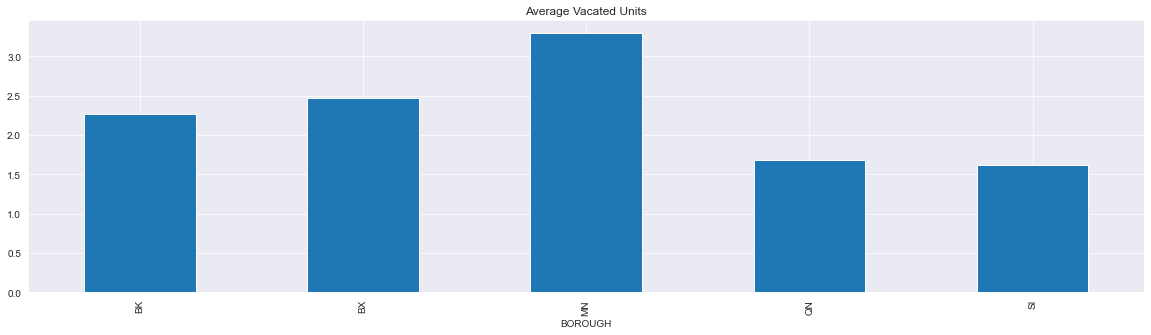

In [134]:
vacated_sum=df_hpd.groupby('BOROUGH')['NUMBER OF VACATED UNITS'].mean()
vacated_sum.plot(kind='bar', title= 'Average Vacated Units' )
plt.show()

In [135]:
df_hpd[['BOROUGH','PRIMARY VACATE REASON']].value_counts()

BOROUGH  PRIMARY VACATE REASON
BX       Fire Damage              958
QN       Illegal Occupancy        914
BK       Fire Damage              903
         Illegal Occupancy        746
MN       Fire Damage              650
BX       Illegal Occupancy        546
QN       Fire Damage              357
BK       Habitability             163
BX       Habitability             152
SI       Illegal Occupancy        147
MN       Illegal Occupancy         72
         Habitability              53
QN       Habitability              50
SI       Fire Damage               30
         Habitability              28
dtype: int64

Comparing Borough with average vacants Manhattan averages the highest, followed by Bronx, Brooklyn, Queens, and Staten Island are close in averages

In [136]:
df_hpd['PRIMARY VACATE REASON'].value_counts()

Fire Damage          2898
Illegal Occupancy    2425
Habitability          446
Name: PRIMARY VACATE REASON, dtype: int64

Highest of primary reason for vacates are Fire Damage and Illegal Occupancy. Borough with the most Fire Damage are Bronx, Brooklyn, Manhatten and Queens. Illegal Occupancy leaders are Queen, Brooklyn,and Bronx.

In [137]:
df_hpd['PRIMARY VACATE REASON'].value_counts(normalize=True)

Fire Damage          0.50234
Illegal Occupancy    0.42035
Habitability         0.07731
Name: PRIMARY VACATE REASON, dtype: float64

52% of orders for repairs and vacates are due to fires, 42% Illegal Occupancy, and 8% Habitability

In [138]:
df_hpd['VACATE TYPE'].value_counts(normalize=True)

Partial            0.882302
Entire Building    0.117698
Name: VACATE TYPE, dtype: float64

88% of buildings are partial vacate or need repairs, and 11% of entire building 

In [127]:
df_hpd[['COMMUNITY BOARD','COUNCIL DISTRICT']].max()

COMMUNITY BOARD     18.0
COUNCIL DISTRICT    51.0
dtype: float64

In [139]:
df_hpd[['COMMUNITY BOARD','COUNCIL DISTRICT']].min()

COMMUNITY BOARD     1.0
COUNCIL DISTRICT    1.0
dtype: float64

In [140]:
df_hpd['rescind_diff']=df_hpd['RESCIND DATE'] - df_hpd['VACATE EFFECTIVE DATE']

In [56]:
df_hpd['rescind_diff'].describe()

count                           2269
mean     463 days 02:28:30.356985456
std      600 days 13:16:35.232616704
min             -3205 days +00:00:00
25%                105 days 00:00:00
50%                233 days 00:00:00
75%                553 days 00:00:00
max               3679 days 00:00:00
Name: rescind_diff, dtype: object

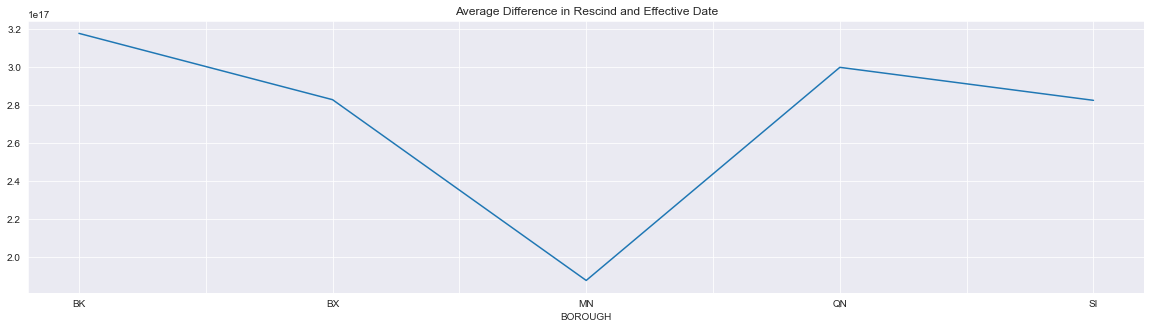

In [141]:
date_by_diff=df_hpd.groupby('BOROUGH')['rescind_diff'].max()
date_by_diff.plot(kind='line', title= 'Average Difference in Rescind and Effective Date')
plt.show()

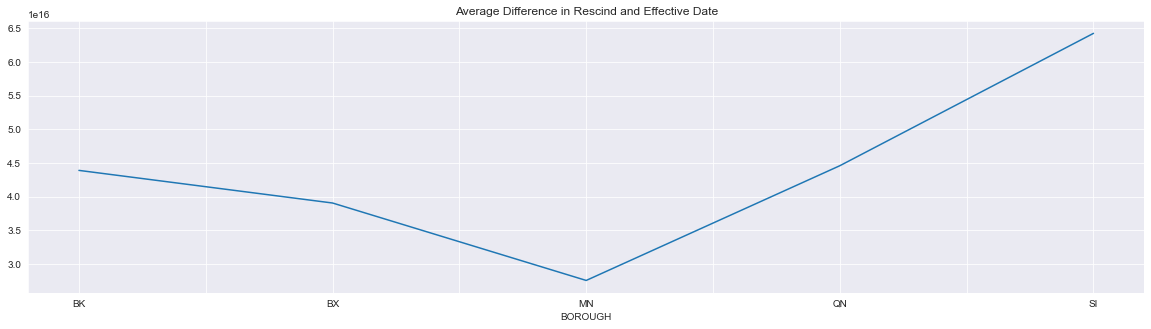

In [142]:
date_by_diff=df_hpd.groupby('BOROUGH')['rescind_diff'].mean()
date_by_diff.plot(kind='line', title= 'Average Difference in Rescind and Effective Date')
plt.show()

Manhattan has the lowest average difference from effective date to the rescind date, followed by Bronx, and Brooklyn. Saten Island and Queens has the highest difference. 

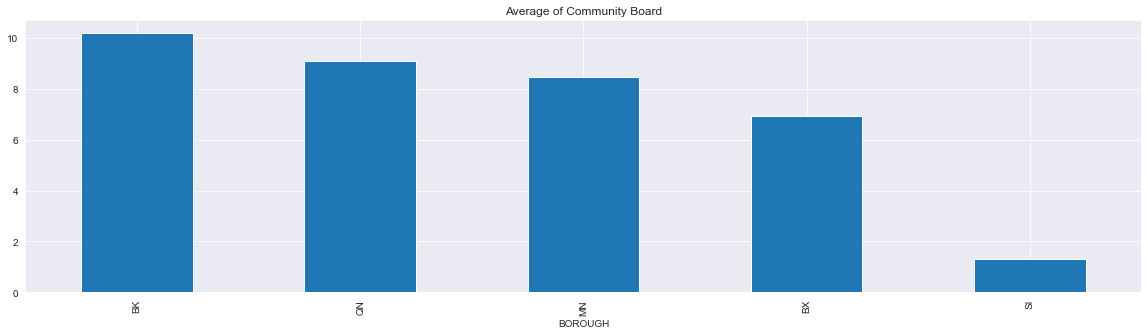

In [143]:
comm_group=df_hpd.groupby('BOROUGH')['COMMUNITY BOARD'].mean().sort_values(ascending=False)
comm_group.plot(kind='bar', title='Average of Community Board')
plt.show()

Brooklyn has the largest location of community boards, follow by Queens and then Manhattan

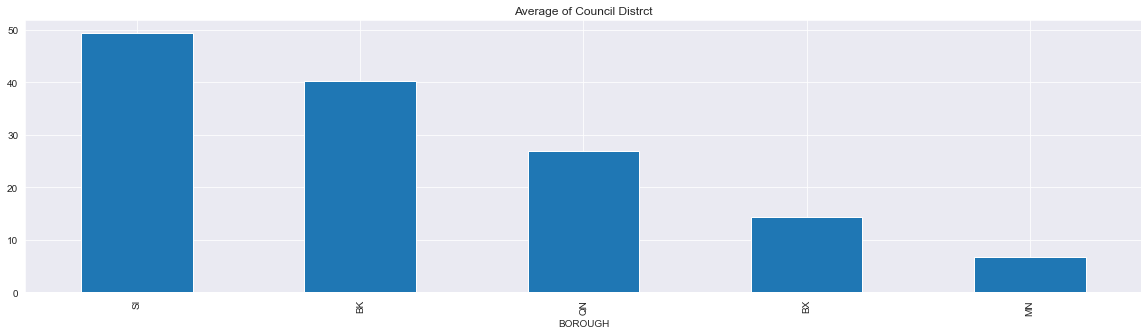

In [144]:
comm_group=df_hpd.groupby('BOROUGH')['COUNCIL DISTRICT'].mean().sort_values(ascending=False)
comm_group.plot(kind='bar', title='Average of Council Distrct')
plt.show()

Staten Island has the largest amount of Council District locations follow by Brooklyn and then Queens

In [145]:
df_hpd['VACATE EFFECTIVE DATE'].min()

Timestamp('2012-01-05 00:00:00')

In [146]:
df_hpd['RESCIND DATE'].min()

Timestamp('2008-08-16 00:00:00')

In [147]:
df_hpd['RESCIND DATE'].max()

Timestamp('2022-03-09 00:00:00')

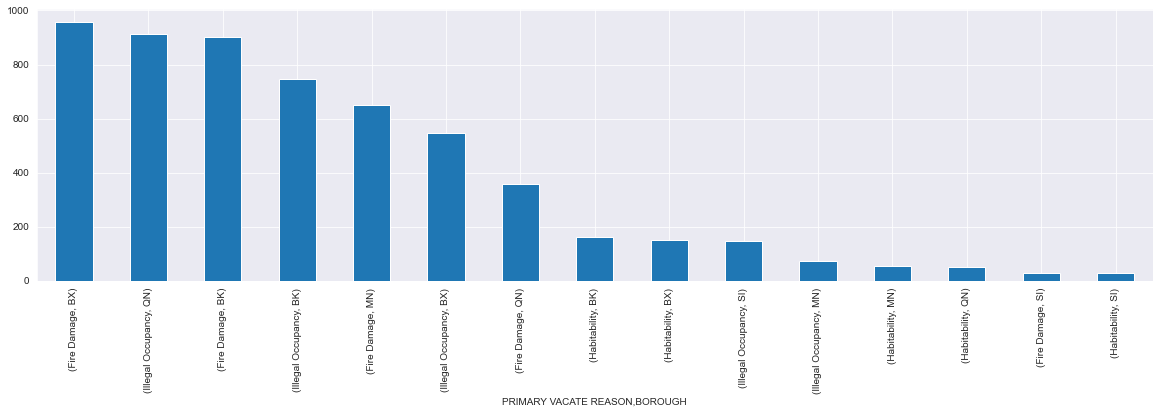

In [148]:
damage_group=df_hpd.groupby('PRIMARY VACATE REASON')['BOROUGH'].value_counts().sort_values(ascending=False)
damage_group.plot(kind='bar')
plt.show()

In [178]:
df_hpd[['BOROUGH','PRIMARY VACATE REASON','VACATE TYPE','rescind_diff']].value_counts().sort_values(ascending=False).head(15)


BOROUGH  PRIMARY VACATE REASON  VACATE TYPE  rescind_diff
QN       Illegal Occupancy      Partial      2 days          9
BX       Fire Damage            Partial      92 days         6
QN       Fire Damage            Partial      35 days         6
BX       Fire Damage            Partial      119 days        5
                                             20 days         5
                                             104 days        5
                                             35 days         5
BK       Fire Damage            Partial      151 days        5
BX       Fire Damage            Partial      53 days         4
MN       Fire Damage            Partial      41 days         4
                                             84 days         4
BX       Fire Damage            Partial      57 days         4
                                             76 days         4
                                             64 days         4
                                             83 days        